<a href="https://colab.research.google.com/github/shahroz-dev/Neural_Network_based_Classification_of_MNIST_Dataset/blob/main/Multi_Class_Classification_of_Fashion_MNIST_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import random

### Import Fashion MNIST Dataset from TensorFlow Datasets

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

# The has already been stored in training and testing
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
# Show the first traning sample
print('Training data sample: \n{}\n'.format(train_data[0]))
print('Training label sample: \n{}\n'.format(train_labels[0]))

Training data sample: 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1

In [ ]:
# Check the shape of a asingle example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

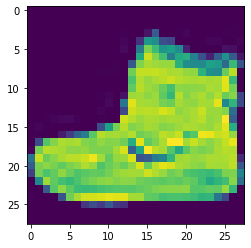

In [ ]:
# Plot a single example
plt.imshow(train_data[0])

In [ ]:
# Create a small list so we can index onto our list ao they're human readables
class_names = ['T-shirst/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

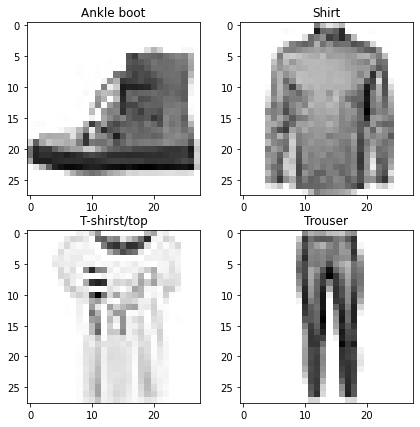

In [ ]:
# Plot multiple random images of fashion MNIST with labels
plt.figure(figsize=(7,7))
for i in range(4):
  ax = plt.subplot(2,2,i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])

### Build Multi-Class Classification Problem

In [ ]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

In [ ]:
# Neural Network prefers data to be scaled (or normalized) between 0 and 1
train_data_norm = train_data / 255
test_data_norm = test_data / 255

In [25]:
# Now let's build neural network based on our normalized data

# 1. Create the model
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28,28)), # Flatten the input 28 * 28 image shape into an array
                             tf.keras.layers.Dense(4, activation='relu'),
                             tf.keras.layers.Dense(4, activation='relu'),
                             tf.keras.layers.Dense(10, activation='softmax'),
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

# Create learning rate schedule callback
lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epochs: 1e-3 * 10**(epochs/20))

# 3. Fit the model
history = model.fit(train_data_norm,
                                tf.one_hot(train_labels, depth=10),
                                epochs=40,
                                validation_data=(test_data_norm, tf.one_hot(test_labels, depth=10)),
                                callbacks=[lr_schedule]) 

Epoch 1/40
1875/1875 [==============================] - 5s 2ms/step - loss: 1.1766 - accuracy: 0.5501 - val_loss: 0.8390 - val_accuracy: 0.6967 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 9s 5ms/step - loss: 0.7374 - accuracy: 0.7366 - val_loss: 0.7280 - val_accuracy: 0.7420 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6592 - accuracy: 0.7686 - val_loss: 0.6639 - val_accuracy: 0.7657 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6237 - accuracy: 0.7856 - val_loss: 0.6514 - val_accuracy: 0.7768 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6055 - accuracy: 0.7901 - val_loss: 0.6351 - val_accuracy: 0.7789 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5966 - accuracy: 0.7936 - val_loss: 0.6416 - val_accuracy: 0.7836 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4s

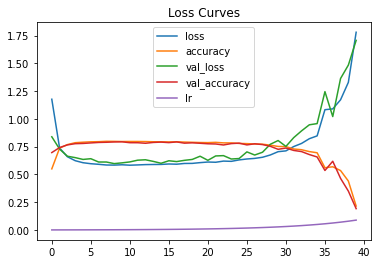

In [26]:
# PLot the loss curves
pd.DataFrame(history.history).plot(title='Loss Curves')

### Finding the ideal learning rate

Text(0.5, 1.0, 'Finding the ideal learning rate')

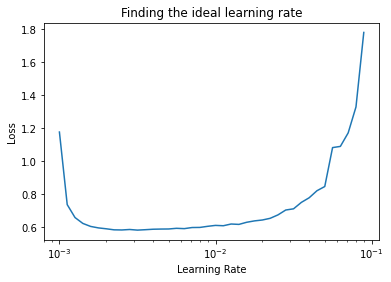

In [27]:
# Find the learning rate scheduler
lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, history.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Finding the ideal learning rate')

**Note:** The loss decreasing sharply at $10^{-3}$ before flattened down, therefore, it is the ideal learning rate. This is also the default learning rate

In [29]:
# Now our data is normalized Let's build model again

# set random seed
tf.random.set_seed(42)

# 1. Create the model
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28,28)), # Flatten the input 28 * 28 image shape into an array
                             tf.keras.layers.Dense(4, activation='relu'),
                             tf.keras.layers.Dense(4, activation='relu'),
                             tf.keras.layers.Dense(10, activation='softmax'),
])

# 2. Compile the model 
model.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(lr=10e-3),
              metrics=['accuracy'])

# 3. Fit the model
history = model.fit(train_data_norm,
                    tf.one_hot(train_labels, depth=10),
                    epochs=40)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/40
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0987 - accuracy: 0.5718
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8661 - accuracy: 0.6932
Epoch 3/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8399 - accuracy: 0.7001
Epoch 4/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8276 - accuracy: 0.7054
Epoch 5/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8201 - accuracy: 0.7060
Epoch 6/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.8157 - accuracy: 0.7085
Epoch 7/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8051 - accuracy: 0.7094
Epoch 8/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7980 - accuracy: 0.7151
Epoch 9/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7903 - accuracy: 0.7189
Epoch 10/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.791

### Evaluate the model

In [ ]:
# Create the confusion matrix function
def plot_confusion_matrix(y_test, y_pred, classes=None, figsize=(10, 10), text_size=15):
  import itertools
  from sklearn.metrics import confusion_matrix

  cm = confusion_matrix(y_test, tf.round(y_pred))
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
  fig.colorbar(cax)

  # Set labels to classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted label",
        ylabel="True label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.xaxis.label.set_size(text_size)
  ax.yaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)


In [30]:
# Make some prediction with our model
y_prob = model.predict(test_data_norm)

# Convert all probabilities into the predictions
y_pred=y_prob.argmax(axis=1)

In [31]:
# Make confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels, y_pred=y_pred)

array([[681,  17,  13, 164,   5,   5,  94,   0,  21,   0],
       [ 17, 927,   2,  40,   0,   0,  12,   0,   2,   0],
       [ 36,   0, 545,  24, 115,   5, 268,   0,   7,   0],
       [ 29,  40,   1, 811,   3,   7, 101,   0,   8,   0],
       [  3,   0, 174,  88, 447,  27, 255,   0,   6,   0],
       [  0,   0,   0,   0,  24, 886,   4,  60,  11,  15],
       [136,   3, 116, 126, 136,   9, 439,   1,  34,   0],
       [  0,   0,   0,   0,   0,  65,   0, 912,   2,  21],
       [  1,   2,   0,  33,  11,  34,  15,  34, 870,   0],
       [  0,   0,   0,   0,   1, 169,   0,  90,   1, 739]])

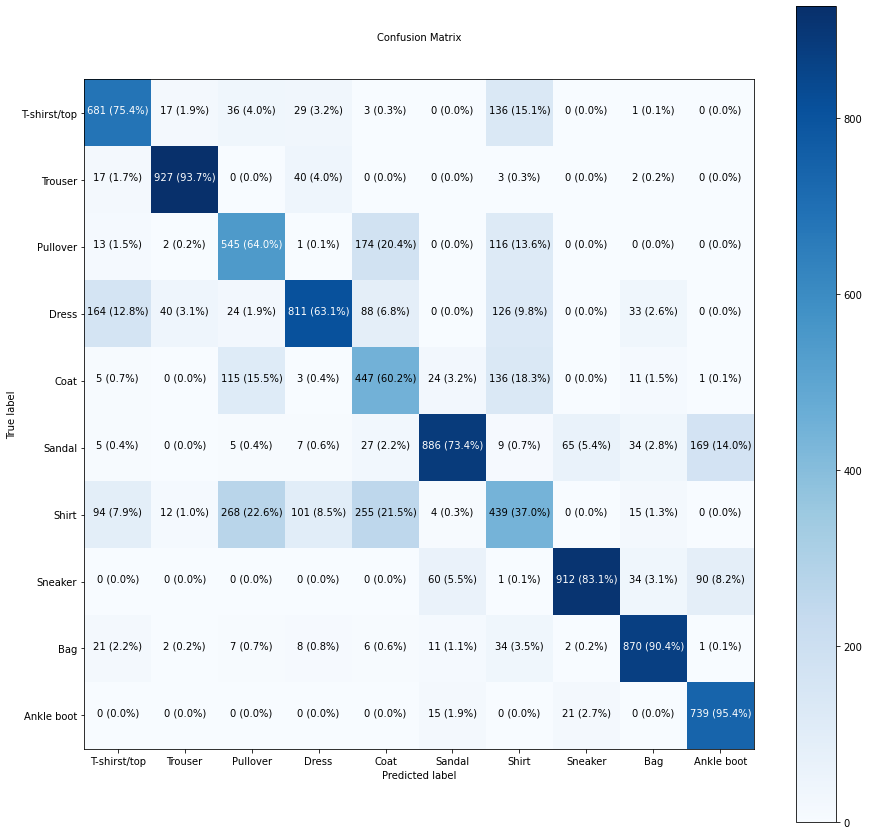

In [32]:
# Plot confusion matrix
plot_confusion_matrix(y_pred, test_labels, classes=class_names, figsize=(15,15), text_size=10)

In [33]:
# Summary
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_24 (Dense)            (None, 4)                 3140      
                                                                 
 dense_25 (Dense)            (None, 4)                 20        
                                                                 
 dense_26 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


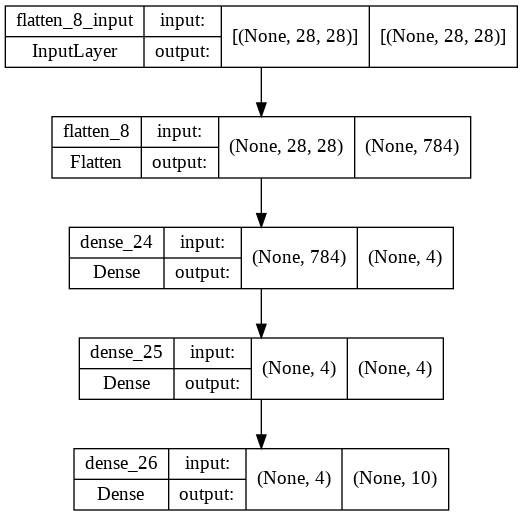

In [34]:
# Visualize the model
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

### Create a little fun function to evaluate our model

1. Plot a random image
2. Make a prediction on said image
3. Label the plot with the true label & the predicted label

In [38]:
from pandas.core.common import get_rename_function
import random 

def plot_random_image(model, images, true_labels, classes):
  """
  Picks a random image, plots it and labels it with a prediction and truth label.
  """

  # Set a random integer
  i = random.randint(0, len(images))
  target_image = images[i]
  pred_prob = model.predict(target_image.reshape(1,28,28))
  pred_label = classes[pred_prob.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if thye prediction is right or wrong
  if pred_label == true_label:
    color='green'
  else:
    color='red'

  # Add xlabel information
  plt.xlabel('Pred: {} {:2.0f}% (True: {})'.format(pred_label, 100*tf.reduce_max(pred_prob),true_label), color=color) 

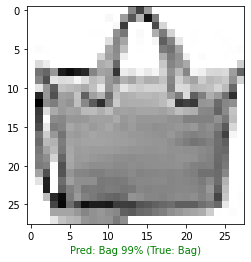

In [58]:
# Check out a random image as well as its prediction
plot_random_image(model=model, images=test_data_norm, true_labels=test_labels, classes=class_names)